### 返回函数
**函数作为返回值**
高阶函数除了可以接受函数作为参数外，还可以把函数作为结果值返回。

我们来实现一个可变参数的求和。通常情况下，求和的函数是这样定义的：

In [1]:
def calc_sum(*args):
    ax = 0
    for n in args:
        ax = ax + n
    return ax

In [2]:
def a():
    def b():
        return '这是b函数'
    return b
a()()


'这是b函数'

In [2]:
#如果不需要立刻求和，而是在后面的代码中，根据需要再计算怎么办？可以不返回求和的结果，而是返回求和的函数：
def lazy_sum(*args):
    def sum():
        ax = 0
        for n in args:
            ax = ax + n
        return ax
    return sum

In [3]:
#调用lazy_sum()时，返回的并不是求和结果，而是求和函数：
f = lazy_sum(1, 3, 5, 7, 9)
f

<function __main__.lazy_sum.<locals>.sum>

In [4]:
#请再注意一点，当我们调用lazy_sum()时，每次调用都会返回一个新的函数，即使传入相同的参数：
f1 = lazy_sum(1, 3, 5, 7, 9)
f2 = lazy_sum(1, 3, 5, 7, 9)
f1==f2

False

**f1()和f2()的调用结果互不影响。**

### 闭包
注意到返回的函数在其定义内部引用了局部变量args，所以，当一个函数返回了一个函数后，其内部的局部变量还被新函数引用，所以，闭包用起来简单，实现起来可不容易。

另一个需要注意的问题是，返回的函数并没有立刻执行，而是直到调用了f()才执行。

In [3]:
def count():
    fs = []
    for i in range(1, 4):
        def f():
             return i*i
        fs.append(f)
    return fs

f1, f2, f3 = count()

In [11]:
# [fn0,fn1,fn2...fn10]
# fn0()==>0
# fn1()==>1

def tt():
    listFn = []
    i = 0
    for i in range(10):
        def fn():
            return i
        listFn.append(fn)
    print('i:',i)
    return listFn

#一个函数的变量被另外一个函数所引用，这个函数的变量在函数执行完毕之后不会被销毁掉，会保留下来，这就是闭包。
#闭包会导致1个问题，那就是内存泄漏。
fnList = tt()
print(fnList[0]())
print(fnList[1]())
fnList[9]()

i: 9
9
9


9

In [12]:
def tt():
    listFn = []
    i = 0
    for i in range(10):
        # i = 0;
        
        def fn(index):
            index = 0
            
            def temp():
                return index
            return temp
        
        fnTmp = fn(i)
            
        
        listFn.append(fnTmp)
    print('i:',i)
    return listFn

fnList = tt()
print(fnList[0]())
print(fnList[1]())
fnList[9]()

i: 9
0
1


9

In [9]:
def abc():
    a = 3
    def c():
        return a
    return c

temp = abc()

In [16]:
temp()

3

In [17]:
def count():
    fn = []
#     fn=[f1,f2,f3]

    for item in range(1,4):
        def f(i):
            def rf():
                return i
            return rf
        fn.append(f(item)) #f(1)=== rf函数，保留了i,来自f(1)的时候得到的参数i,参数i的变量会一直保留在内存里面。
        
    return fn

# f1 = count()[0]()
# f2 = count()[1]()
# f3 = count()[2]()

# print(f1,f2,f3)==》1,2,3

# f1 = count()[0]()
# f2 = count()[1]()
# f3 = count()[2]()
# print(f1,f2,f3)



1 2 3
10
0


In [ ]:
### `count()[0]()`
#### count()
1. fn = []
2. [1,2,3]
3. item = 1
4. 申明了f(i)函数，f=lambda i:lambda :i
5. fn.append(f(1))==>fn.append(lambda:1)
6. fn =[lambda:1]
6. item =2
7. 申明了f(i)函数，f=lambda i:lambda :i
5. fn.append(f(2))==>fn.append(lambda:1)
6. fn =[lambda:1,lambda:2]
9. item =3
10. 申明了f(i)函数，f=lambda i:lambda :i
5. fn.append(f(3))==>fn.append(lambda:1)
6. fn =[lambda:1,lambda:2,lambda:3]
12. `count()[0]()`实质是将item=返回

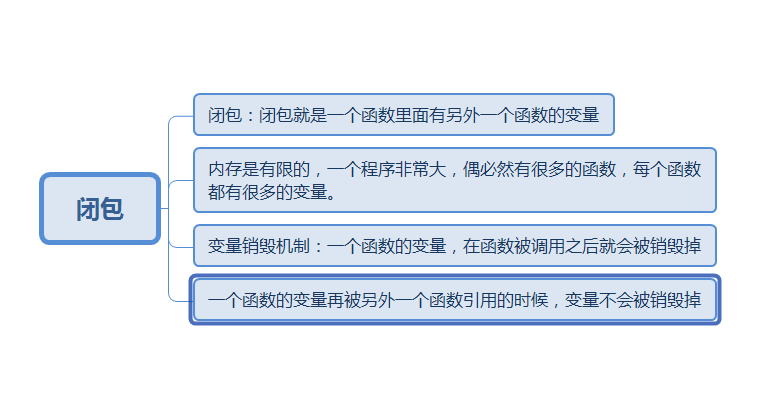

In [8]:
def count():
    fn = []
#     fn=[f1,f2,f3]
    for item in range(1,4):
        def f():
            return item
        fn.append(f) #f(1)=== rf函数，保留了i,来自f(1)的时候得到的参数i,参数i的变量会一直保留在内存里面。
        
    return fn

f1 = count()[0]()
f2 = count()[1]()
f3 = count()[2]()
# print(f1,f2,f3)



3 3 3


### `count()[0]()`
#### count()
1. fn = []
2. [1,2,3]
3. item = 1
4. 申明了f函数，f=lambda :item
5. fn=[lambda :item]
6. item =2
7. 申明了新的f函数，f=lambda :item
8. fn=[lambda :item,lambda:item]
9. item =3
10. 申明了新的f函数，f=lambda :item
11. fn=[lambda :item,lambda:item,lambda:item]
12. `count()[0]()`实质是将item=返回


调用f1()，f2()和f3()结果应该是1，4，9，但实际结果是：
```
>>> f1()
9
>>> f2()
9
>>> f3()
9
```

#### 返回闭包时牢记一点：返回函数不要引用任何循环变量，或者后续会发生变化的变量。
如果一定要引用循环变量怎么办？方法是再创建一个函数，用该函数的参数绑定循环变量当前的值，无论该循环变量后续如何更改，已绑定到函数参数的值不变：


In [6]:
def count():
    def f(j):
        def g():
            return j*j
        return g
    fs = []
    for i in range(1, 4):
        fs.append(f(i)) # f(i)立刻被执行，因此i的当前值被传入f()
    return fs

In [7]:
f1, f2, f3 = count()

In [8]:
f1()

1

In [9]:
f2()

4

In [10]:
f3()

9